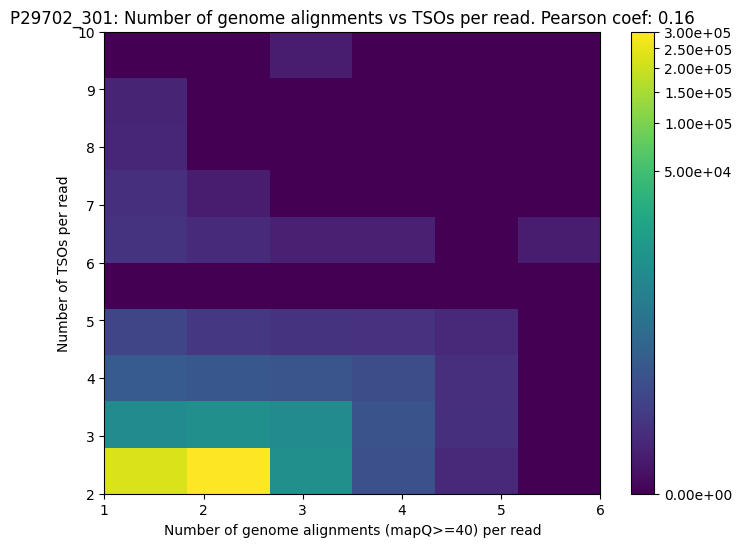

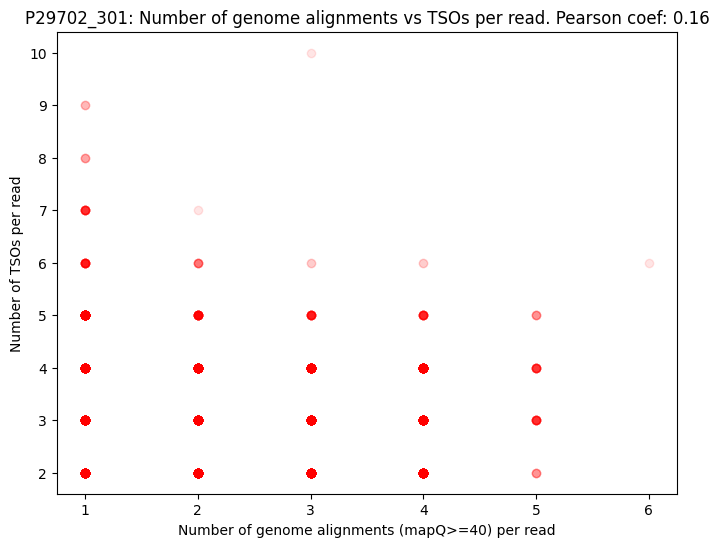

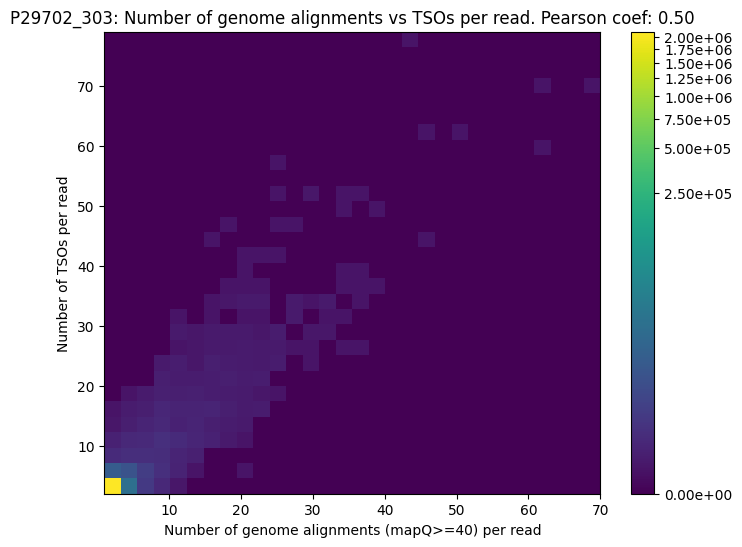

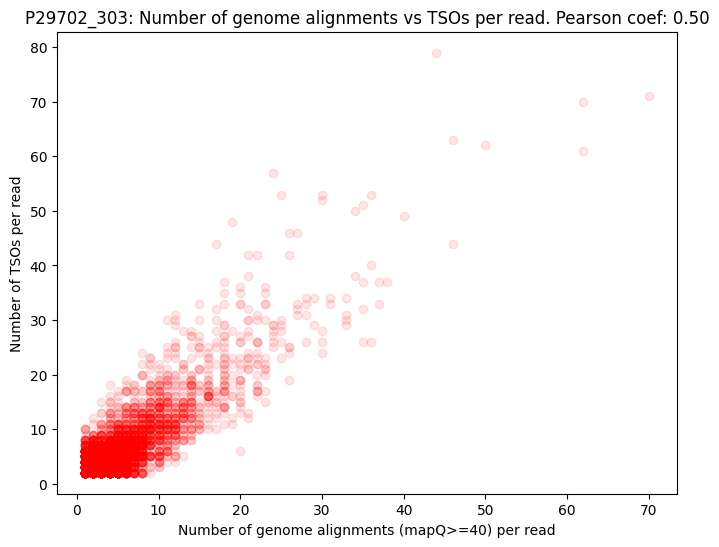

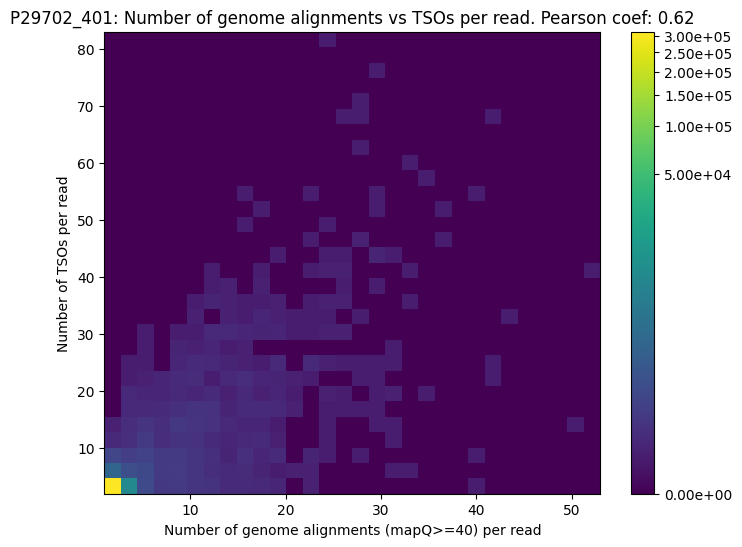

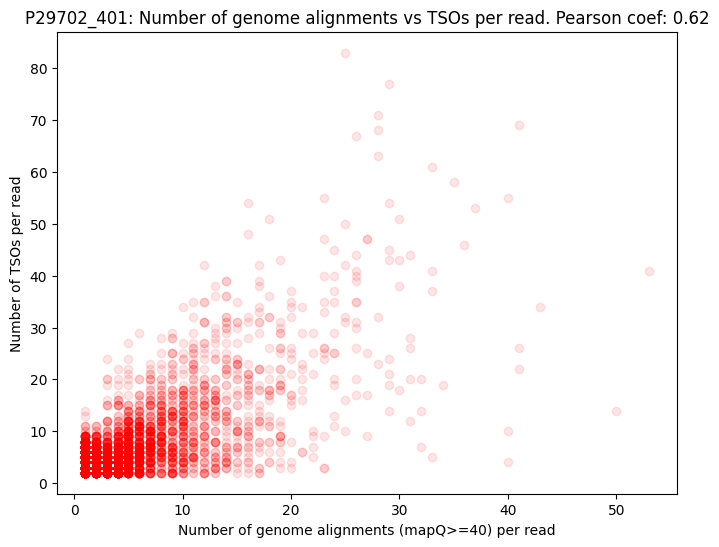

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


#load alns and tsos data, add headers for all samples
alns_301 = pd.read_csv('P29702_301_alns.tsv', sep='\t', header=None, names=['ID', 'no_alns'])
tsos_301 = pd.read_csv('P29702_301_tsos.tsv', sep='\t', header=None, names=['ID', 'no_tsos'])
alns_303 = pd.read_csv('P29702_303_alns.tsv', sep='\t', header=None, names=['ID', 'no_alns'])
tsos_303 = pd.read_csv('P29702_303_tsos.tsv', sep='\t', header=None, names=['ID', 'no_tsos'])
alns_401 = pd.read_csv('P29702_401_alns.tsv', sep='\t', header=None, names=['ID', 'no_alns'])
tsos_401 = pd.read_csv('P29702_401_tsos.tsv', sep='\t', header=None, names=['ID', 'no_tsos'])

# Join the two dataframes on the ID column
df_301 = pd.merge(tsos_301,alns_301, on='ID',)
df_303 = pd.merge(tsos_303,alns_303, on='ID',)
df_401 = pd.merge(tsos_401,alns_401, on='ID',)

# pearson correlation coefficient
pearson_301 = df_301['no_alns'].corr(df_301['no_tsos'])
pearson_303 = df_303['no_alns'].corr(df_303['no_tsos'])
pearson_401 = df_401['no_alns'].corr(df_401['no_tsos'])

plt.rcParams["figure.figsize"] = (8,6)
plt.hist2d(df_301['no_alns'], df_301['no_tsos'], (6,10), norm=mcolors.PowerNorm(0.2), cmap=plt.cm.viridis)
plt.colorbar(format="%4.2e")
plt.xlabel('Number of genome alignments (mapQ>=40) per read')
plt.ylabel('Number of TSOs per read')
plt.title(f'P29702_301: Number of genome alignments vs TSOs per read. Pearson coef: {pearson_301:.2f}')
plt.show()

plt.scatter(df_301['no_alns'], df_301['no_tsos'], alpha=0.1, color='red')
plt.xlabel('Number of genome alignments (mapQ>=40) per read')
plt.ylabel('Number of TSOs per read')
plt.title(f'P29702_301: Number of genome alignments vs TSOs per read. Pearson coef: {pearson_301:.2f}')
plt.show()


plt.hist2d(df_303['no_alns'], df_303['no_tsos'], (30,30), norm=mcolors.PowerNorm(0.2), cmap=plt.cm.viridis)
plt.colorbar(format="%4.2e")
plt.xlabel('Number of genome alignments (mapQ>=40) per read')
plt.ylabel('Number of TSOs per read')
plt.title(f'P29702_303: Number of genome alignments vs TSOs per read. Pearson coef: {pearson_303:.2f}')
plt.show()

plt.scatter(df_303['no_alns'], df_303['no_tsos'], alpha=0.1, color='red')
plt.xlabel('Number of genome alignments (mapQ>=40) per read')
plt.ylabel('Number of TSOs per read')
plt.title(f'P29702_303: Number of genome alignments vs TSOs per read. Pearson coef: {pearson_303:.2f}')
plt.show()

plt.hist2d(df_401['no_alns'], df_401['no_tsos'], (30,30), norm=mcolors.PowerNorm(0.2), cmap=plt.cm.viridis)
plt.colorbar(format="%4.2e")
plt.xlabel('Number of genome alignments (mapQ>=40) per read')
plt.ylabel('Number of TSOs per read')
plt.title(f'P29702_401: Number of genome alignments vs TSOs per read. Pearson coef: {pearson_401:.2f}')
plt.show()

plt.scatter(df_401['no_alns'], df_401['no_tsos'], alpha=0.1, color='red')
plt.xlabel('Number of genome alignments (mapQ>=40) per read')
plt.ylabel('Number of TSOs per read')
plt.title(f'P29702_401: Number of genome alignments vs TSOs per read. Pearson coef: {pearson_401:.2f}')
plt.show()

In [6]:
# load coord file
coords = pd.read_csv('P29702_303_alns_coords.tsv', sep='\t', header=None, names=['ID', 'chr', 'start', 'end'])

# Only keep row if there are 2 or more of the same ID
nonsingle = coords[coords.duplicated(subset='ID', keep=False)]

# Per duplicated ID count the number of unique chromosomes
uniq_chroms_per = nonsingle.groupby('ID')['chr'].nunique()

# total number of reads
print(f'Total number of reads with at least two alignments: {len(uniq_chroms_per)}')
# % with 1 unique chromosome
print(f'Percentage of reads with 1 unique chromosome ("cis"): {100*(uniq_chroms_per==1).sum()/len(uniq_chroms_per):.2f}')
# % with 2 or more unique chromosomes
print(f'Percentage of reads with 2 or more unique chromosomes ("trans"): {100*(uniq_chroms_per>1).sum()/len(uniq_chroms_per):.2f}')

# Get all rows with 1 unique chromosome
one_uniq_chroms_per = uniq_chroms_per[uniq_chroms_per==1]
# Get mean distance between start values for each ID
mean_dist = nonsingle[nonsingle['ID'].isin(one_uniq_chroms_per.index)].groupby('ID')['start'].apply(lambda x: x.diff().abs().mean())
print(f'Mean distance between alignments on 1 unique chromosome: {median_dist.mean():.2f}')
# % of reads with distance between alignments < 1000
print(f'Percentage of reads with distance between alignments == 0: {100*(mean_dist==0).sum()/len(mean_dist):.2f}')
# % of reads with distance between alignments < 1000
print(f'Percentage of reads with distance between alignments < 1000: {100*(mean_dist<1000).sum()/len(mean_dist):.2f}')


Total number of reads with at least two alignments: 1031068
Percentage of reads with 1 unique chromosome ("cis"): 11.16
Percentage of reads with 2 or more unique chromosomes ("trans"): 88.84


NameError: name 'median_dist' is not defined